In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

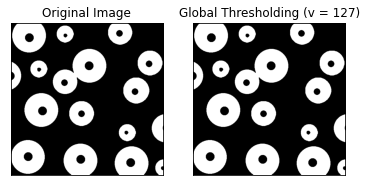

In [2]:
img = cv.imread('files/gerdalies.tif',0)
img0 = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img0,127,255,cv.THRESH_BINARY)


titles = ['Original Image', 'Global Thresholding (v = 127)']
images = [img0, th1]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

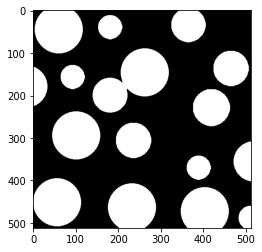

In [3]:
img=255 - th1
contours, hierarchy = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# RETR_CCOMP   cv2.RETR_EXTERNAL

counter = 0
circles = []
for c in contours:
    if len(c)>0:
        counter += 1
        x, y, w, h = cv.boundingRect(c)
        if cv.contourArea(c) < 800:
            cv.rectangle(img, (x, y), (x+w, y+h), (0,0,0), -1)
        circles.append(img[y:y+h, x:x+w])
        
plt.imshow(255 - img, cmap='gray')


In [4]:
# len(circles)
len(contours)

26